In [80]:
import pandas as pd
import pandas_datareader as pdr
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from tensorflow.keras.layers import Dense,LSTM,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error
import math

In [229]:
df = pdr.get_data_tiingo('GOOGL', api_key='ef9f83b5eb2c88c6717b0ffd4ca55e8ab654395a')

In [230]:
df.to_csv('Stock_Google')

In [231]:
df = pd.read_csv('Stock_Google')

In [232]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOGL,2016-05-16 00:00:00+00:00,730.30,732.68,720.000,724.32,1126862,730.30,732.68,720.000,724.32,1126862,0.0,1.0
1,GOOGL,2016-05-17 00:00:00+00:00,720.19,735.85,718.000,731.06,1670176,720.19,735.85,718.000,731.06,1670176,0.0,1.0
2,GOOGL,2016-05-18 00:00:00+00:00,721.78,725.57,715.020,718.50,1626800,721.78,725.57,715.020,718.50,1626800,0.0,1.0
3,GOOGL,2016-05-19 00:00:00+00:00,715.31,720.50,710.305,718.30,1529910,715.31,720.50,710.305,718.30,1529910,0.0,1.0
4,GOOGL,2016-05-20 00:00:00+00:00,721.71,727.70,715.010,716.46,1739895,721.71,727.70,715.010,716.46,1739895,0.0,1.0


In [233]:
df.tail(10)

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1249,GOOGL,2021-05-03 00:00:00+00:00,2343.08,2381.5500,2335.5000,2364.91,1412139,2343.08,2381.5500,2335.5000,2364.91,1412139,0.0,1.0
1250,GOOGL,2021-05-04 00:00:00+00:00,2306.83,2324.9899,2256.6800,2313.55,2240932,2306.83,2324.9899,2256.6800,2313.55,2240932,0.0,1.0
1251,GOOGL,2021-05-05 00:00:00+00:00,2314.77,2335.0000,2308.2800,2328.63,1331809,2314.77,2335.0000,2308.2800,2328.63,1331809,0.0,1.0
1252,GOOGL,2021-05-06 00:00:00+00:00,2337.35,2337.3500,2293.0418,2306.33,1259523,2337.35,2337.3500,2293.0418,2306.33,1259523,0.0,1.0
1253,GOOGL,2021-05-07 00:00:00+00:00,2351.93,2371.2500,2346.1550,2363.89,1444862,2351.93,2371.2500,2346.1550,2363.89,1444862,0.0,1.0
1254,GOOGL,2021-05-10 00:00:00+00:00,2291.75,2331.0000,2284.5400,2328.14,1545729,2291.75,2331.0000,2284.5400,2328.14,1545729,0.0,1.0
1255,GOOGL,2021-05-11 00:00:00+00:00,2270.06,2280.2800,2233.9200,2243.07,1709292,2270.06,2280.2800,2233.9200,2243.07,1709292,0.0,1.0
1256,GOOGL,2021-05-12 00:00:00+00:00,2200.25,2247.9800,2193.6200,2226.19,2318774,2200.25,2247.9800,2193.6200,2226.19,2318774,0.0,1.0
1257,GOOGL,2021-05-13 00:00:00+00:00,2229.04,2239.4375,2206.7200,2226.12,1661020,2229.04,2239.4375,2206.7200,2226.12,1661020,0.0,1.0
1258,GOOGL,2021-05-14 00:00:00+00:00,2278.38,2284.7200,2250.0000,2258.54,1599829,2278.38,2284.7200,2250.0000,2258.54,1599829,0.0,1.0


In [234]:
df1 = df.close

In [235]:
df1.shape

(1259,)

In [236]:
mn = MinMaxScaler()
df2 = mn.fit_transform(np.array(df1).reshape(-1,1))

In [237]:
df2[-5:]

array([[0.94098573],
       [0.92831353],
       [0.88752761],
       [0.90434793],
       [0.93317442]])

In [251]:
def data_gen(size):
    X = []
    y = []
    for i in range(len(df1)-size):
        X.append(df2[i:size+i,0])
        y.append(df2[size+i,0])
    X = np.array(X)
    y = np.array(y)
    return X,y

In [252]:
X,y = data_gen(100)

In [253]:
X.size

115900

In [254]:
X[1158]

array([0.61057945, 0.61545203, 0.607074  , 0.61175378, 0.61521833,
       0.63847116, 0.62900644, 0.6164394 , 0.62601512, 0.61052687,
       0.61865952, 0.60862808, 0.63869317, 0.65241701, 0.6281476 ,
       0.6171288 , 0.62286606, 0.61332539, 0.61139739, 0.64461154,
       0.70046506, 0.70284876, 0.70776224, 0.70876713, 0.71675372,
       0.66475035, 0.68476648, 0.66966967, 0.7080602 , 0.7232797 ,
       0.80493334, 0.80186607, 0.82243138, 0.8199133 , 0.81457917,
       0.82105841, 0.82238464, 0.82605368, 0.83520875, 0.83983594,
       0.83235181, 0.8224197 , 0.80223414, 0.8056578 , 0.81949849,
       0.77985184, 0.78333392, 0.81123146, 0.80820509, 0.77719938,
       0.7903565 , 0.82724553, 0.77491499, 0.79411318, 0.79167689,
       0.82927285, 0.79974527, 0.8023393 , 0.81954523, 0.81856954,
       0.7830009 , 0.78628434, 0.78846356, 0.79467989, 0.78953857,
       0.78949767, 0.78498148, 0.79728561, 0.7976829 , 0.80705998,
       0.84635608, 0.89845877, 0.89279162, 0.9101845 , 0.91684

In [255]:
y[1158]

0.9331744195557424

In [256]:
X_train,y_train = X[:round(len(X)*0.65)],y[:round(len(y)*0.65)]
X_test,y_test = X[round(len(X)*0.65):],y[round(len(y)*0.65):]

In [257]:
X_train, X_test = X_train.reshape(753,100,1) , X_test.reshape(406,100,1)

In [258]:
model = Sequential()

model.add(LSTM(50,input_shape=(100,1),return_sequences = True))
model.add(Dropout(0.25))
model.add(LSTM(50))
model.add(Dense(1))

model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_36 (LSTM)               (None, 100, 50)           10400     
_________________________________________________________________
dropout_14 (Dropout)         (None, 100, 50)           0         
_________________________________________________________________
lstm_37 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 51        
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [259]:
adam = Adam(learning_rate = 1e-9)

model.compile(optimizer='adam',
             loss='mean_squared_error')

In [260]:
result = model.fit(X_train,y_train,
                  epochs=10,
                  batch_size=32,
                  verbose = 2,
                  validation_data = (X_test,y_test))

Epoch 1/10
24/24 - 2s - loss: 0.0078 - val_loss: 0.0302
Epoch 2/10
24/24 - 1s - loss: 9.7580e-04 - val_loss: 0.0073
Epoch 3/10
24/24 - 1s - loss: 4.9115e-04 - val_loss: 0.0022
Epoch 4/10
24/24 - 1s - loss: 4.1740e-04 - val_loss: 0.0017
Epoch 5/10
24/24 - 1s - loss: 4.1071e-04 - val_loss: 0.0021
Epoch 6/10
24/24 - 1s - loss: 4.1918e-04 - val_loss: 0.0023
Epoch 7/10
24/24 - 1s - loss: 4.3731e-04 - val_loss: 0.0032
Epoch 8/10
24/24 - 1s - loss: 4.2195e-04 - val_loss: 0.0024
Epoch 9/10
24/24 - 1s - loss: 3.7616e-04 - val_loss: 0.0018
Epoch 10/10
24/24 - 1s - loss: 3.7902e-04 - val_loss: 0.0023


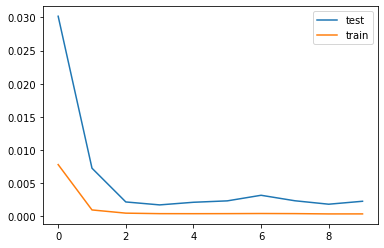

In [261]:
plt.plot(result.history['val_loss'])
plt.plot(result.history['loss'])
plt.legend(['test','train'])

In [262]:
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

In [263]:
pred_train[0]

array([0.07697523], dtype=float32)

In [264]:
y_train[0]

0.07124244867435531

In [265]:
train_pred = mn.inverse_transform(pred_train)
test_pred = mn.inverse_transform(pred_test)

In [266]:
y_train = mn.inverse_transform(y_train.reshape(1,-1))
y_test = mn.inverse_transform(y_test.reshape(1,-1))

In [268]:
math.sqrt(mean_squared_error(y_train,train_pred.T))

30.924133296019534

In [269]:
math.sqrt(mean_squared_error(y_test,test_pred.T))

81.79111851539955

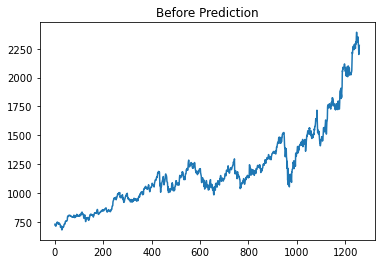

In [270]:
plt.title('Before Prediction')
plt.plot(df1)

In [88]:
X

array([[0.02872133, 0.02281464, 0.02374359, ..., 0.069665  , 0.07107302,
        0.0701616 ],
       [0.02281464, 0.02374359, 0.01996354, ..., 0.07107302, 0.0701616 ,
        0.07124245],
       [0.02374359, 0.01996354, 0.02370269, ..., 0.0701616 , 0.07124245,
        0.0698578 ],
       ...,
       [0.62867342, 0.61892827, 0.61057945, ..., 0.97614541, 0.94098573,
        0.92831353],
       [0.61892827, 0.61057945, 0.61545203, ..., 0.94098573, 0.92831353,
        0.88752761],
       [0.61057945, 0.61545203, 0.607074  , ..., 0.92831353, 0.88752761,
        0.90434793]])

In [289]:
pred_f = model.predict(X[-1].reshape(1,100,1))

In [290]:
pred_f

array([[0.89545226]], dtype=float32)

In [93]:
y

array([0.07124245, 0.0698578 , 0.07772169, ..., 0.88752761, 0.90434793,
       0.93317442])

In [295]:
model.predict((np.append(X[-1,-100:-4],np.array([0.89545226,0.8950572,0.8955775,0.8929034]))).reshape(1,100,1))

array([[0.88884366]], dtype=float32)

In [273]:
a=[pred_f]
X_a = X[-1,:99]
for i in range(2,50):
    X_f = (np.append(X_a,np.array(a))).reshape(1,100,1)
    X_a = X[-1,-100:-i]
    pred_f = model.predict(X_f)
    a.append(pred_f)
    print(a[-1])

[[0.8950572]]
[[0.8955775]]
[[0.8929034]]
[[0.88884366]]
[[0.8815474]]
[[0.87485886]]
[[0.8691262]]
[[0.86366683]]
[[0.85699505]]
[[0.8501911]]
[[0.842661]]
[[0.83606106]]
[[0.8306317]]
[[0.82493323]]
[[0.8193676]]
[[0.8141686]]
[[0.80882627]]
[[0.80353355]]
[[0.7982784]]
[[0.79311496]]
[[0.78802556]]
[[0.78304166]]
[[0.7781199]]
[[0.77327055]]
[[0.7684943]]
[[0.7637881]]
[[0.7591502]]
[[0.7545749]]
[[0.7500696]]
[[0.7456115]]
[[0.7412062]]
[[0.7368633]]
[[0.73258376]]
[[0.7283636]]
[[0.72420454]]
[[0.72010404]]
[[0.71606123]]
[[0.7120731]]
[[0.70813906]]
[[0.70425767]]
[[0.70042974]]
[[0.6966521]]
[[0.692923]]
[[0.6892424]]
[[0.6856092]]
[[0.6820219]]
[[0.6784799]]
[[0.6749822]]


In [276]:
final_1 = np.array(a).reshape(49)

In [277]:
final = mn.inverse_transform(final_1.reshape(-1,1))

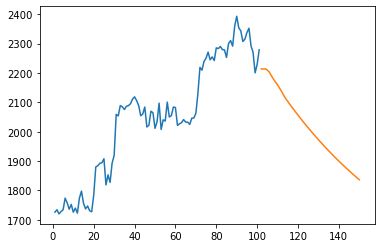

In [280]:
day_new=np.arange(1,102)
day_pred=np.arange(102,151)

plt.plot(day_new,df1[1158:])
plt.plot(day_pred,pd.Series(final.flatten()))